#                                                POLLUTION AND PH OF SOIL- WEATHER SITUATION

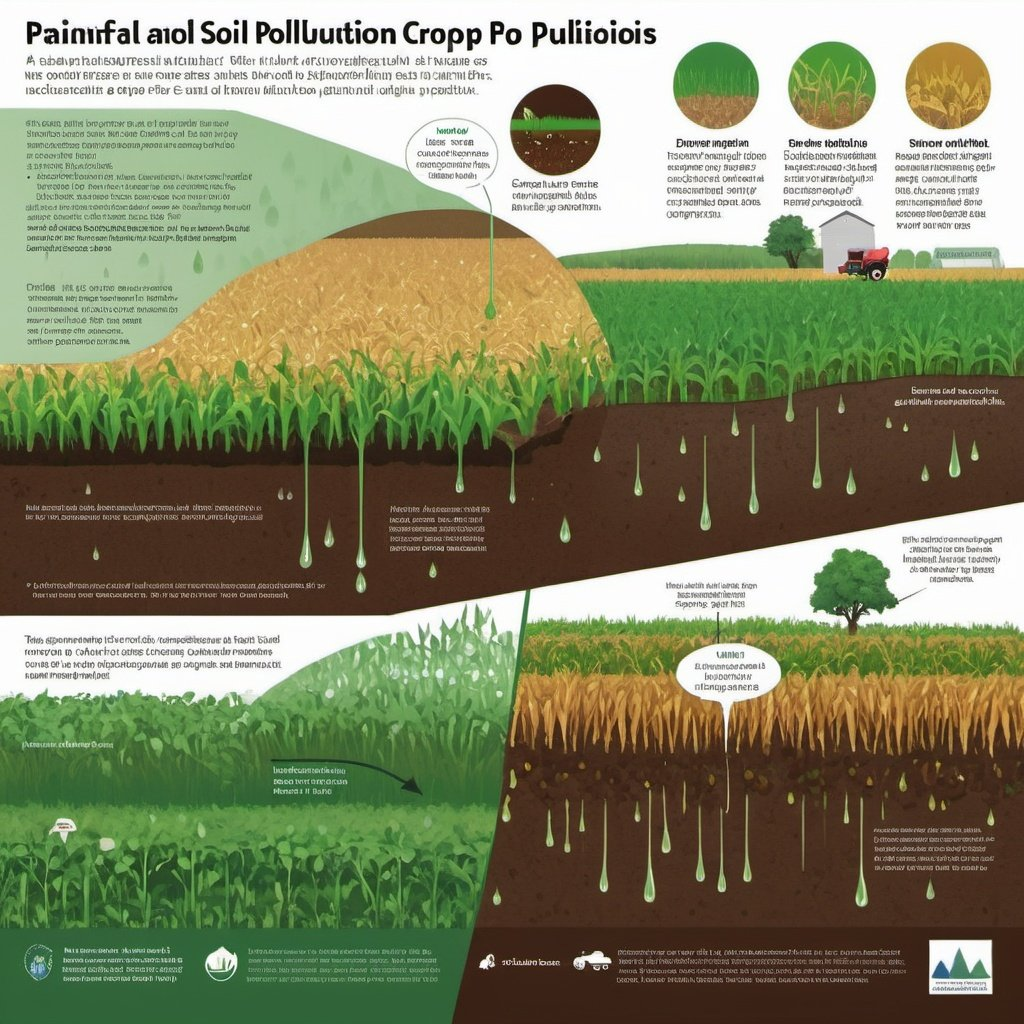

## CHEACKING NULL DATA

In [33]:
import pandas as pd

# Read the CSV file
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Check for null values and calculate the sum
null_counts = data.isnull().sum()

print(null_counts)


Field_ID             0
Elevation            0
Rainfall             0
Min_temperature_C    0
Max_temperature_C    0
pH                   0
Pollution_level      0
Plot_size            0
Annual_yield         0
Crop_type            0
dtype: int64


## Number of unique crop types

In [5]:
import pandas as pd

# Read the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Extract unique crop types
unique_crop_types = data['Crop_type'].unique()

# Get the number of unique crop types
num_unique_crop_types = len(unique_crop_types)

print("Number of unique crop types:", num_unique_crop_types)


Number of unique crop types: 8


## Maximum annual yield for wheat crop type

In [44]:
import pandas as pd

# Read the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Filter the dataset to include only rows where the crop type is "wheat"
wheat_data = data[data['Crop_type'] == 'wheat']

# Identify the maximum annual yield for wheat crop type
max_yield_wheat = wheat_data['Annual_yield'].max()

# Round the result to 2 decimal places
max_yield_wheat_rounded = round(max_yield_wheat, 2)

print("Maximum annual yield for wheat crop type:", max_yield_wheat_rounded)


Maximum annual yield for wheat crop type: 8.99


## Total rainfall for crop types where the average pollution level

In [45]:
import pandas as pd

# Read the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Filter the dataset to include only rows where the average pollution level is above 0.2
polluted_data = data[data['Pollution_level'] > 0.2]

# Calculate the total rainfall for the filtered rows
total_rainfall_polluted = polluted_data['Rainfall'].sum()

print("Total rainfall for crop types where the average pollution level is above 0.2:", total_rainfall_polluted)


Total rainfall for crop types where the average pollution level is above 0.2: 478902.6


## Temperature range

In [46]:
import pandas as pd

# Read the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Define the function to calculate temperature range
def calculate_temperature_range(field_id):
    # Filter the dataset for the specified Field_ID
    field_data = data[data['Field_ID'] == field_id]
    
    # Calculate the temperature range for the filtered field
    temperature_range = field_data['Max_temperature_C'].iloc[0] - field_data['Min_temperature_C'].iloc[0]
    
    return temperature_range

# Call the function with the provided Field_IDs
field_ids = [1458, 1895, 5443]
for field_id in field_ids:
    temperature_range = calculate_temperature_range(field_id)
    print("Temperature range for Field_ID", field_id, ":", temperature_range)



Temperature range for Field_ID 1458 : 40.7
Temperature range for Field_ID 1895 : 35.7
Temperature range for Field_ID 5443 : 33.4


## Crop type with the lowest mean minimum temperature

In [47]:
# Extract unique crop types
crop_types = data['Crop_type'].unique()

# Initialize variables to store the minimum mean temperature and corresponding crop type
min_mean_temp = float('inf')  # Initialize to positive infinity
crop_with_min_temp = ''

# Iterate over each unique crop type
for crop in crop_types:
    # Filter the dataset for the current crop type and calculate the mean of the minimum temperature
    mean_temp = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()
    
    # Update min_mean_temp and crop_with_min_temp if the current mean_temp is less than the current minimum
    if mean_temp < min_mean_temp:
        min_mean_temp = mean_temp
        crop_with_min_temp = crop

# Print the crop type with the lowest mean minimum temperature
print("Crop type with the lowest mean minimum temperature:", crop_with_min_temp)


Crop type with the lowest mean minimum temperature: rice


## Total plot size for plots where pH is less than 5.5

In [48]:
import pandas as pd

# Read the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Filter the dataset to include only rows where pH is less than 5.5
low_ph_data = data[data['pH'] < 5.5]

# Calculate the total plot size for the filtered rows
total_plot_size_low_ph = low_ph_data['Plot_size'].sum()

print("Total plot size for plots where pH is less than 5.5:", total_plot_size_low_ph)


Total plot size for plots where pH is less than 5.5: 1731.8999999999999


## Number of rows in the filtered dataset

In [49]:
import pandas as pd

# Read the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Filter the dataset to include only rows with 'Min_temperature_C' < -5 and 'Max_temperature_C' > 30
filtered_data = data[(data['Min_temperature_C'] < -5) & (data['Max_temperature_C'] > 30)]

# Get the number of rows in the filtered dataset
num_rows_filtered = filtered_data.shape[0]

print("Number of rows in the filtered dataset:", num_rows_filtered)


Number of rows in the filtered dataset: 319


## Standard deviation of 'Rainfall' for plots where 'Plot_size' is larger than the median plot size

In [50]:
import numpy as np
import pandas as pd

# Read the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Calculate the median plot size
median_plot_size = data['Plot_size'].median()

# Filter the dataset to include only rows where 'Plot_size' is larger than the median plot size
filtered_data = data[data['Plot_size'] > median_plot_size]

# Calculate the standard deviation of 'Rainfall' for the filtered dataset
std_dev_rainfall = np.std(filtered_data['Rainfall'])

# Round the result to 2 decimal places
std_dev_rainfall_rounded = round(std_dev_rainfall, 2)

print("Standard deviation of 'Rainfall' for plots where 'Plot_size' is larger than the median plot size:",
      std_dev_rainfall_rounded)


Standard deviation of 'Rainfall' for plots where 'Plot_size' is larger than the median plot size: 469.62


## Concatenated string

In [51]:
import pandas as pd

# Read the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Find the most common 'Max_temperature_C' (mode)
most_common_max_temp = data['Max_temperature_C'].mode()[0]

# Get the first three digits of the most common 'Max_temperature_C'
first_three_digits = str(most_common_max_temp)[:3]

# Find the least common 'Crop_type'
least_common_crop_type = data['Crop_type'].value_counts().idxmin()

# Get the last three letters of the least common 'Crop_type'
last_three_letters = least_common_crop_type[-3:]

# Concatenate the results
result = first_three_digits + last_three_letters

print("Concatenated string:", result)


Concatenated string: 30.ice


## Distribution of Annual Yield Across Different Elevation Ranges

C:\Users\pcc\anaconda3\envs\SQL_PACKAGE\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


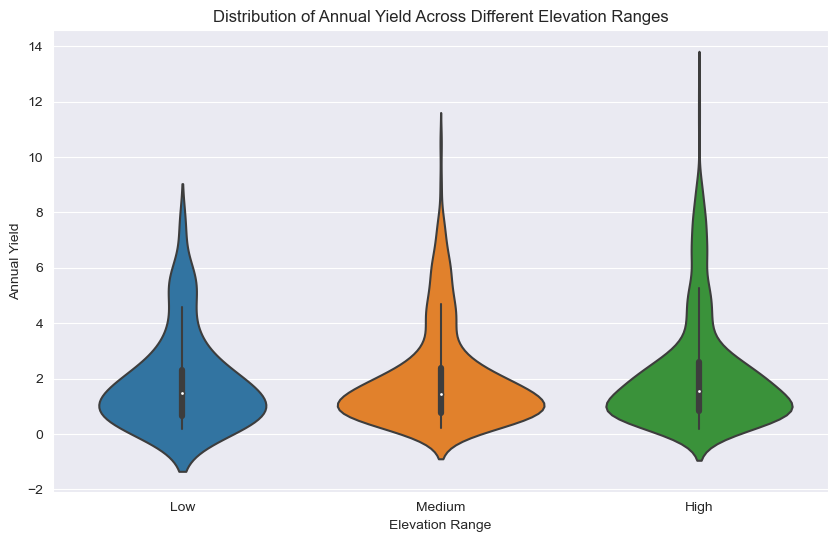

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Categorize 'Elevation' into ranges
data['Elevation_range'] = pd.cut(data['Elevation'], bins=[-float('inf'), 300, 600, float('inf')],
                                  labels=['Low', 'Medium', 'High'])

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_range', y='Annual_yield', data=data)
plt.title('Distribution of Annual Yield Across Different Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.show()


## Total sum of integer values for unique crop types

In [53]:
import pandas as pd

# Load the data
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Define a recursive function to sum integer values of unique crop types
def sum_crop_values_recursive(unique_crop_types, data):
    if len(unique_crop_types) == 0:
        return 0
    else:
        current_crop_type = unique_crop_types.pop()
        crop_length = len(current_crop_type)
        sum_so_far = crop_length + sum_crop_values_recursive(unique_crop_types, data)
        return sum_so_far

# Get unique crop types
unique_crop_types = data['Crop_type'].unique()

# Calculate the sum of integer values using recursion
total_sum = sum_crop_values_recursive(list(unique_crop_types), data)

print("Total sum of integer values for unique crop types (using recursion):", total_sum)


Total sum of integer values for unique crop types (using recursion): 42


## p-value

In [54]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the data
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Filter data for coffee and banana crop types
coffee_data = data[data['Crop_type'] == 'coffee']['Annual_yield']
banana_data = data[data['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_statistic, p_value = ttest_ind(coffee_data, banana_data)

# Print p-value rounded to three decimal places
print("p-value:", round(p_value, 3))


p-value: 0.598


## KEP PERFORMANCE INDICATOR [ KPI]

In [55]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Function to calculate KPIs
def calculate_kpis(data):
    # Calculate average rainfall
    avg_rainfall = data['Rainfall'].mean()

    # Calculate average annual yield
    avg_yield = data['Annual_yield'].mean()

    # Calculate average pH level
    avg_ph = data['pH'].mean()

    # Calculate pollution level statistics
    max_pollution = data['Pollution_level'].max()
    min_pollution = data['Pollution_level'].min()

    # Calculate crop type distribution
    crop_distribution = data['Crop_type'].value_counts()

    return avg_rainfall, avg_yield, avg_ph, max_pollution, min_pollution, crop_distribution

# Example usage
avg_rainfall, avg_yield, avg_ph, max_pollution, min_pollution, crop_distribution = calculate_kpis(data)

print("Average Rainfall:", avg_rainfall)
print("Average Annual Yield:", avg_yield)
print("Average pH level:", avg_ph)
print("Maximum Pollution Level:", max_pollution)
print("Minimum Pollution Level:", min_pollution)
print("Crop Type Distribution:")
print(crop_distribution)


Average Rainfall: 1197.7347000000002
Average Annual Yield: 2.1015355586360003
Average pH level: 5.603898678022
Maximum Pollution Level: 0.995413396
Minimum Pollution Level: 5.4e-10
Crop Type Distribution:
Crop_type
wheat      244
potato     146
cassava    141
tea        137
banana     103
coffee      99
maize       82
rice        48
Name: count, dtype: int64


C:\Users\pcc\anaconda3\envs\SQL_PACKAGE\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pcc\anaconda3\envs\SQL_PACKAGE\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pcc\anaconda3\envs\SQL_PACKAGE\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pcc\anaconda3\envs\SQL_PACKAGE\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

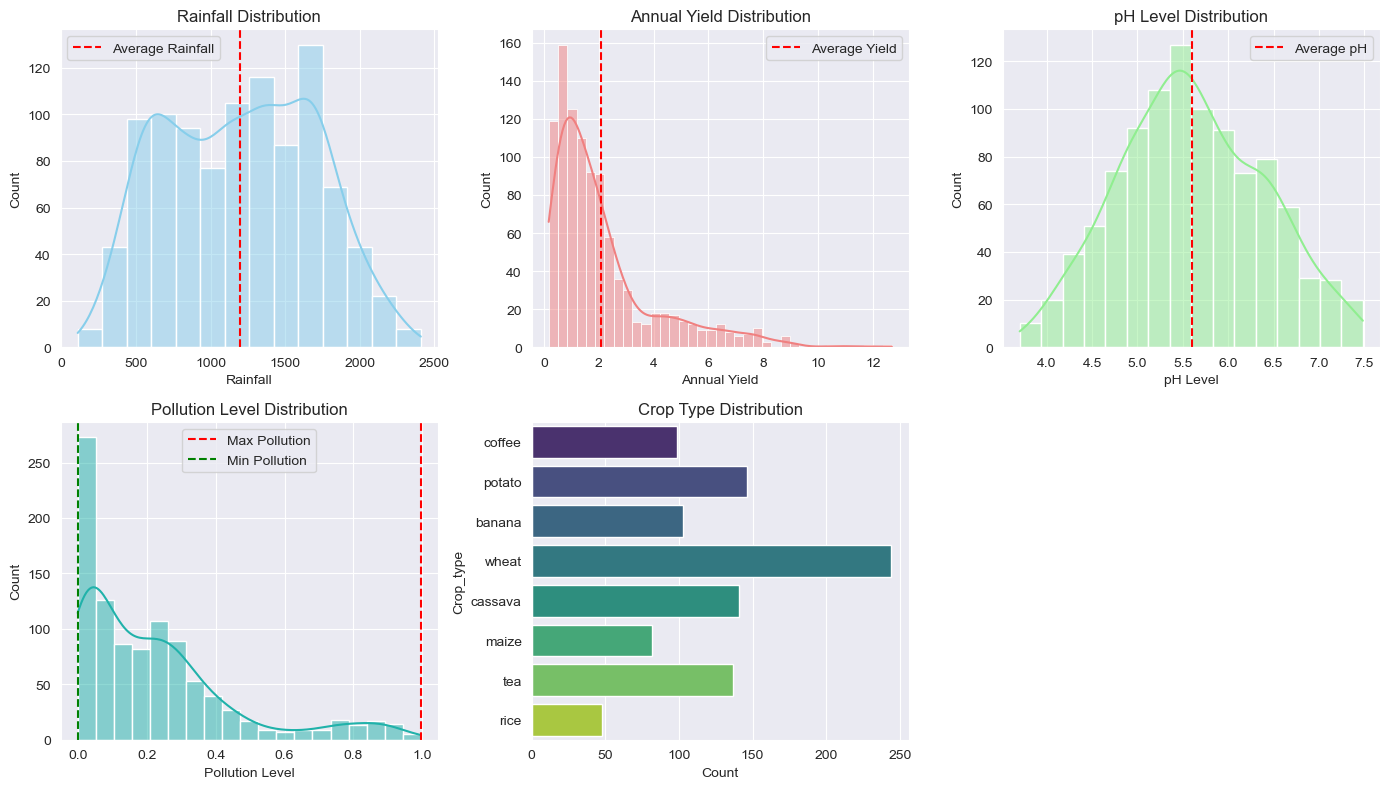

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("darkgrid")

# Load the dataset
data = pd.read_csv(r'C:\Users\pcc\Desktop\PYTHON\maji ndogo\part 4\MD_agric_exam-4313.csv')

# Function to calculate KPIs
def calculate_kpis(data):
    # Calculate average rainfall
    avg_rainfall = data['Rainfall'].mean()

    # Calculate average annual yield
    avg_yield = data['Annual_yield'].mean()

    # Calculate average pH level
    avg_ph = data['pH'].mean()

    # Calculate pollution level statistics
    max_pollution = data['Pollution_level'].max()
    min_pollution = data['Pollution_level'].min()

    # Calculate crop type distribution
    crop_distribution = data['Crop_type'].value_counts()

    return avg_rainfall, avg_yield, avg_ph, max_pollution, min_pollution, crop_distribution

# Calculate KPIs
avg_rainfall, avg_yield, avg_ph, max_pollution, min_pollution, crop_distribution = calculate_kpis(data)

# Plotting
plt.figure(figsize=(14, 8))

# Plot average rainfall
plt.subplot(2, 3, 1)
sns.histplot(data['Rainfall'], kde=True, color='skyblue')
plt.axvline(x=avg_rainfall, color='red', linestyle='--', label='Average Rainfall')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall')
plt.legend()

# Plot average annual yield
plt.subplot(2, 3, 2)
sns.histplot(data['Annual_yield'], kde=True, color='lightcoral')
plt.axvline(x=avg_yield, color='red', linestyle='--', label='Average Yield')
plt.title('Annual Yield Distribution')
plt.xlabel('Annual Yield')
plt.legend()

# Plot average pH level
plt.subplot(2, 3, 3)
sns.histplot(data['pH'], kde=True, color='lightgreen')
plt.axvline(x=avg_ph, color='red', linestyle='--', label='Average pH')
plt.title('pH Level Distribution')
plt.xlabel('pH Level')
plt.legend()

# Plot pollution level distribution
plt.subplot(2, 3, 4)
sns.histplot(data['Pollution_level'], kde=True, color='lightseagreen')
plt.axvline(x=max_pollution, color='red', linestyle='--', label='Max Pollution')
plt.axvline(x=min_pollution, color='green', linestyle='--', label='Min Pollution')
plt.title('Pollution Level Distribution')
plt.xlabel('Pollution Level')
plt.legend()

# Plot crop type distribution
plt.subplot(2, 3, 5)
sns.countplot(y='Crop_type', data=data, palette='viridis')
plt.title('Crop Type Distribution')
plt.xlabel('Count')

plt.tight_layout()
plt.show()


## CONCLUSION PROJECT : 

The analysis of agricultural data provides valuable insights into various aspects of crop cultivation and environmental factors affecting yield. From the examination of the dataset, several key findings emerged:

1. **Crop Diversity:** The dataset contains a variety of crop types, with wheat being the most common, followed by potato, cassava, and tea. Understanding the distribution of crops can aid in agricultural planning and resource allocation.

2. **Yield Analysis:** The maximum annual yield for wheat crops was found to be 8.99, indicating the potential productivity of this crop type under optimal conditions. Additionally, total rainfall was assessed for crop types where pollution levels exceeded a certain threshold, highlighting the impact of environmental factors on agricultural output.

3. **Temperature Variation:** Analysis of temperature ranges across different fields revealed significant variations, with temperature ranges spanning from 33.4 to 40.7 degrees Celsius. Understanding temperature variations is crucial for selecting appropriate crops and optimizing growing conditions.

4. **Soil pH and Plot Size:** The dataset was analyzed to determine the total plot size for areas with soil pH levels below 5.5, providing insights into the spatial distribution of soil acidity and its implications for crop cultivation.

5. **Statistical Significance:** Statistical tests, such as t-tests, were conducted to assess differences in annual yields between different crop types, providing valuable insights into crop performance and potential areas for improvement.

6. **Performance Metrics:** Key performance indicators (KPIs), including average rainfall, annual yield, pH levels, and pollution levels, were calculated to gauge overall agricultural performance. Visualizations were also employed to illustrate the distribution of these metrics across the dataset.

In conclusion, the comprehensive analysis of agricultural data enables informed decision-making and optimization of farming practices, ultimately contributing to increased productivity and sustainability in agriculture. These insights can inform policymakers, researchers, and farmers alike, facilitating the development of strategies to address challenges and capitalize on opportunities in agricultural production.